# Healthcare Insurance Cost Analysis

## Objective
Analyse healthcare insurance data to understand what factors drive medical charges
and provide actionable insights relevant to cost management and insurance risk.


## Dataset Overview
The dataset contains individual-level health and demographic attributes such as:
- age, sex, BMI, number of children
- smoking status, region
- insurance charges (target / outcome)

Key goal: identify which factors are most strongly associated with higher charges.


## Approach
1. Load and inspect data
2. Clean and validate (missing values, duplicates, invalid ranges)
3. Explore distributions of charges and key drivers
4. Answer business questions with visualisations
5. Summarise key insights and recommendations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("Insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

**Here all data types are correct**

In [18]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [20]:
df['age'].nunique()

47

In [22]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [24]:
df['sex'].nunique()

2

In [32]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [34]:
df['bmi'].nunique()

548

In [36]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [38]:
df['children'].nunique()

6

In [40]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [44]:
df['smoker'].nunique()

2

In [42]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [46]:
df['region'].nunique()

4

In [48]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603], shape=(1337,))

In [50]:
df['charges'].nunique()

1337

**Checking Duplicates**

In [55]:
df.duplicated().sum()

np.int64(1)

In [57]:
df=df.drop_duplicates()

In [59]:
df.duplicated().sum()

np.int64(0)

**Checking Null Values**

In [61]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
cols = ["age", "bmi", "children", "charges"]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(col, "outliers:", df[(df[col] < lower) | (df[col] > upper)].shape[0])



age outliers: 0
bmi outliers: 9
children outliers: 0
charges outliers: 139


In [72]:
df["charges_outlier"] = ((df["charges"] < lower_bound) | (df["charges"] > upper_bound)).astype(int)

df["charges_outlier"]

0       0
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    0
Name: charges_outlier, Length: 1337, dtype: int64

## Q1: How are medical charges distributed?

**Why it matters:**  
Understanding the distribution of medical charges helps identify whether costs are
evenly spread or driven by a small group of high-cost individuals. This is important
for cost management and risk assessment in healthcare insurance.


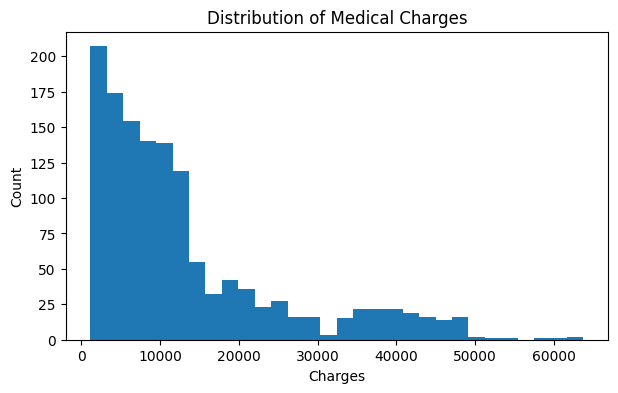

In [75]:
plt.figure(figsize=(7,4))
plt.hist(df["charges"], bins=30)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()


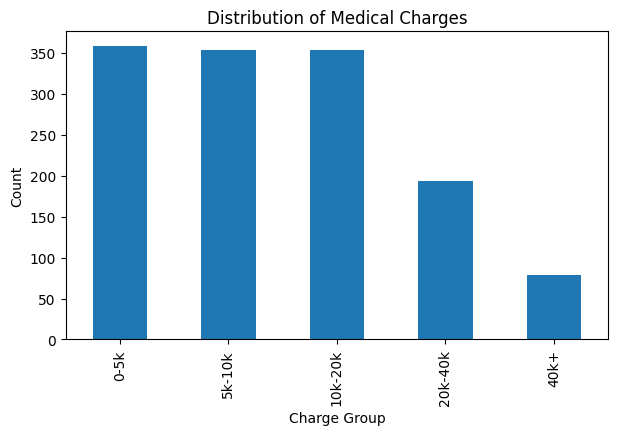

In [88]:
df["charge_group"] = pd.cut(
    df["charges"],
    bins=[0, 5000, 10000, 20000, 40000, 70000],
    labels=["0-5k","5k-10k","10k-20k","20k-40k","40k+"]
)

charge_dist = df["charge_group"].value_counts().sort_index()

charge_dist.plot(kind="bar", figsize=(7,4))
plt.title("Distribution of Medical Charges")
plt.xlabel("Charge Group")
plt.ylabel("Count")
plt.show()


## Q2: Do smokers pay higher charges than non-smokers?

**Why it matters:**  
Smoking is a known health risk factor. Comparing charges between smokers and
non-smokers helps insurers understand how lifestyle choices impact healthcare costs
and pricing strategies.


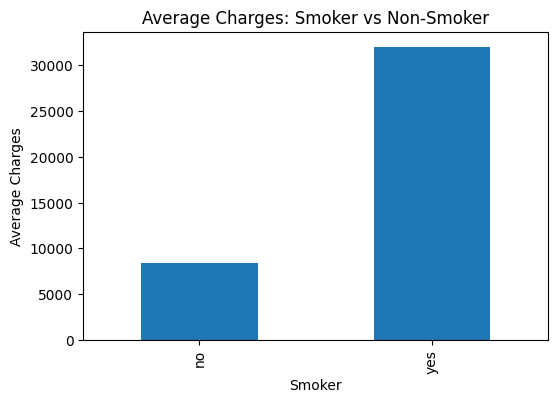

In [90]:
smoker_charges = df.groupby("smoker")["charges"].mean()

smoker_charges.plot(kind="bar", figsize=(6,4))
plt.title("Average Charges: Smoker vs Non-Smoker")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()



## Q3: How does age affect medical charges?

**Why it matters:**  
Healthcare costs typically increase with age. Analysing charges by age group helps
identify how medical expenses change across the customer lifecycle and supports
age-based cost forecasting.


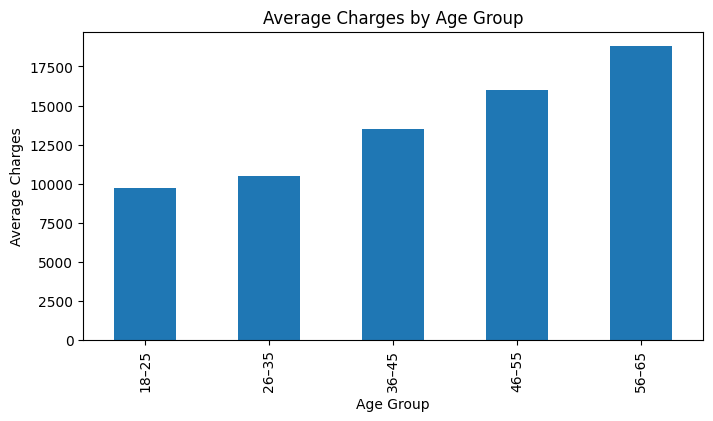

In [102]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[18,25,35,45,55,65],
    labels=["18–25","26–35","36–45","46–55","56–65"]
)

age_avg = df.groupby("age_group")["charges"].mean()

age_avg.plot(kind="bar", figsize=(8,4))
plt.title("Average Charges by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Charges")
plt.show()


## Q4: What is the relationship between BMI and medical charges?

**Why it matters:**  
BMI is an indicator of overall health risk. Understanding its relationship with
medical charges helps identify whether higher BMI is associated with increased
healthcare spending.


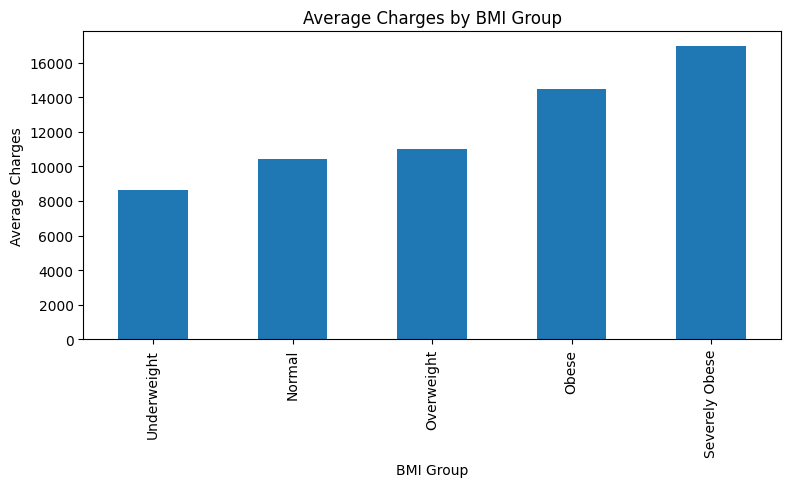

In [104]:
df["bmi_group"] = pd.cut(
    df["bmi"],
    bins=[0,18.5,25,30,35,60],
    labels=["Underweight","Normal","Overweight","Obese","Severely Obese"]
)

bmi_avg = df.groupby("bmi_group")["charges"].mean()

bmi_avg.plot(kind="bar", figsize=(9,4))
plt.title("Average Charges by BMI Group")
plt.xlabel("BMI Group")
plt.ylabel("Average Charges")
plt.show()

## Q5: How do medical charges vary by number of children (stacked by smoking status)?

**Why it matters:**  
Family size can influence healthcare utilisation. Stacking by smoking status helps
separate the effect of dependents from lifestyle-related risk factors.


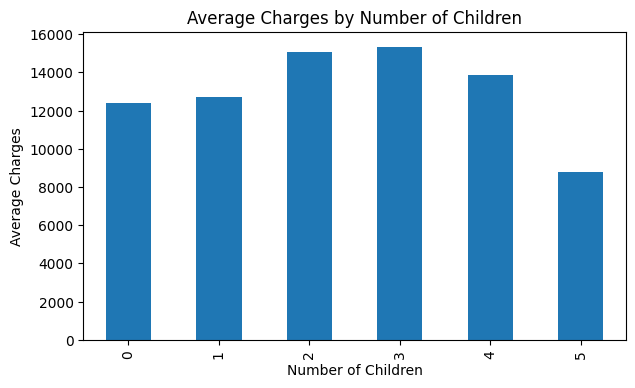

In [106]:
children_avg = df.groupby("children")["charges"].mean()

children_avg.plot(kind="bar", figsize=(7,4))
plt.title("Average Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Average Charges")
plt.show()

## Q6: How do medical charges vary across regions (stacked by smoking status)?

**Why it matters:**  
Regional differences may reflect variations in healthcare access, costs, or behaviour.
Including smoking status helps determine whether regional cost differences are driven
by lifestyle risk or geographic factors.


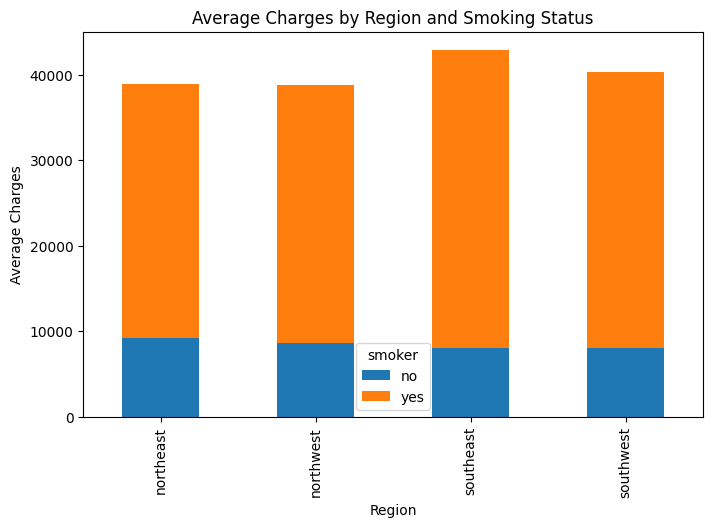

In [100]:
region_smoker = df.pivot_table(
    values="charges",
    index="region",
    columns="smoker",
    aggfunc="mean"
)

region_smoker.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Average Charges by Region and Smoking Status")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.show()


## Q7: What is the average medical charge by sex?

**Why it matters:**  
Analysing charges by sex helps identify demographic cost differences and supports
fair and data-driven insurance pricing decisions.


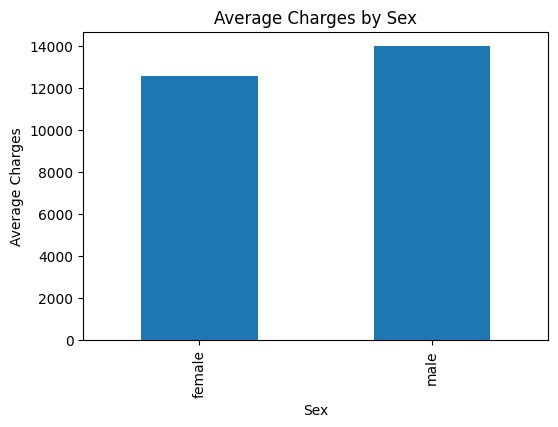

In [109]:
sex_avg = df.groupby("sex")["charges"].mean()

sex_avg.plot(kind="bar", figsize=(6,4))
plt.title("Average Charges by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Charges")
plt.show()


## Q8: How do charges differ between smokers and non-smokers across age groups?

**Why it matters:**  
This analysis shows whether the impact of smoking on medical charges changes with
age, helping identify high-risk segments within specific age groups.


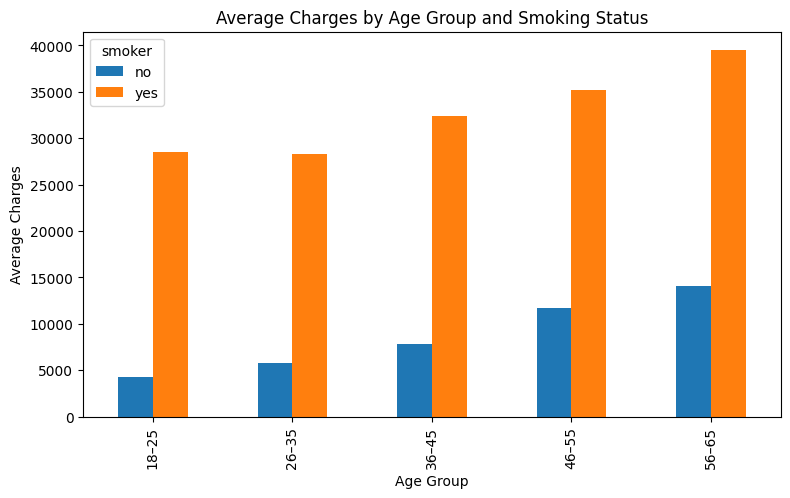

In [112]:
age_smoker_avg = df.groupby(["age_group","smoker"])["charges"].mean().unstack()

age_smoker_avg.plot(kind="bar", figsize=(9,5))
plt.title("Average Charges by Age Group and Smoking Status")
plt.xlabel("Age Group")
plt.ylabel("Average Charges")
plt.show()


## Q9: How do charges differ between smokers and non-smokers across BMI groups?

**Why it matters:**  
Combining BMI and smoking status helps assess how multiple risk factors interact and
contribute to higher healthcare costs.


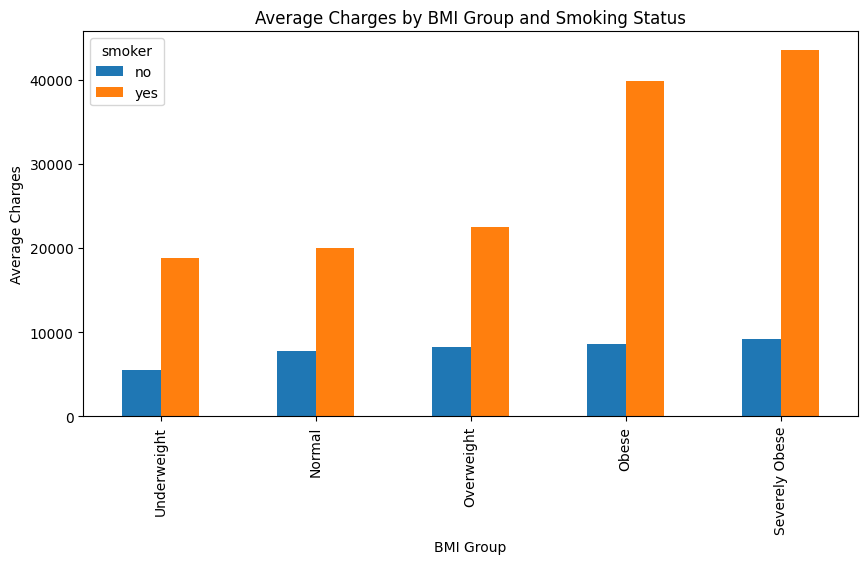

In [115]:
bmi_smoker_avg = df.groupby(["bmi_group","smoker"])["charges"].mean().unstack()

bmi_smoker_avg.plot(kind="bar", figsize=(10,5))
plt.title("Average Charges by BMI Group and Smoking Status")
plt.xlabel("BMI Group")
plt.ylabel("Average Charges")
plt.show()


## Q10: How many customers fall into the top 5% of medical charges?

**Why it matters:**  
High-cost individuals often drive a disproportionate share of total healthcare
spending. Identifying this group helps with targeted risk management and cost-control
strategies.


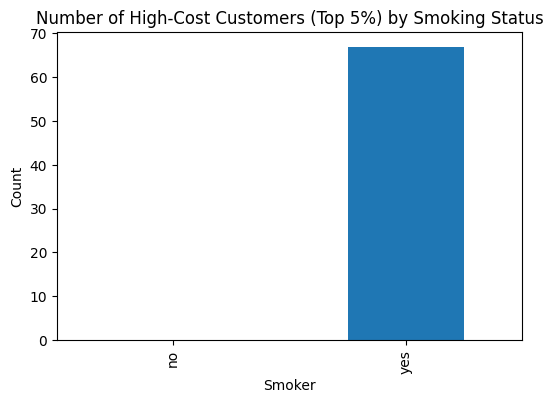

In [118]:
threshold = df["charges"].quantile(0.95)
df["high_cost"] = df["charges"] >= threshold

high_cost_count = df.groupby("smoker")["high_cost"].sum()

high_cost_count.plot(kind="bar", figsize=(6,4))
plt.title("Number of High-Cost Customers (Top 5%) by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()


## Final Key Insights

- Healthcare insurance charges are highly concentrated, with a small group of
high-cost customers driving a large share of total spending.
- Smoking status is the strongest and most consistent driver of higher medical
charges across age groups, BMI levels, regions, and family sizes.
- Medical charges increase with age, reflecting higher expected healthcare needs
over time.
- BMI shows a positive relationship with charges, especially when combined with
other risk factors such as smoking.
- Regional and demographic differences exist, but lifestyle-related risk factors
have a greater impact on costs than location or sex alone.
